# Physics, units, quantities

## Working with units

Python, NumPy, Pandas, xarray etc. do not natively work with physical units and quantities.
This implies, in particular, that using correct quantities and units is not easily enforced.
Mistakes in formulas or, more importantly, inputs to the formulas, are undetected.
This can lead to severe errors.

![](metric-english-whatever.jpg)

Lessons have been learned (sometimes at a hundred-million dollar scale cost)
and physical units and quantities can be used quite seamlessly and safely.
Open question remains why it is not happening very often.

### Libraries for working with units

There are several Python libraries that bring units into the scienticic Python world.
The two probably most frequently used are:
* [Astropy](https://docs.astropy.org/en/stable/units/)
* [Pint](https://pint.readthedocs.io/)

Astropy is a community package for Astronomy in Python. 
Its units subpackage is well designed and maintained and also used in other projects,
such as [PlasmaPy](https://www.plasmapy.org).
Pint, on the other hand, deals with units only. And it does it very weel.
There are also extensions for [Pandas](https://pypi.org/project/pint-pandas/)
or [xarray](https://pypi.org/project/pint-xarray/), which make this package even more powerful.

We will use Astropy here because we will also introduce PlasmaPy and 
because other Astropy's functionality can be useful for this audience.
The concepts shown are rather general though and easily translated into Pint.

### First calculations with quantities and units



In [ ]:
import numpy as np
from astropy import units

In [ ]:
# add units to native Python scalars

radius = 0.5 * units.meter

radius

<Quantity 0.5 m>

Claculations with units are coded the same way as without units.
The difference is in the results, which contain appropriate units.

In [ ]:
# calculate circle circumference

circumference = 2 * np.pi * radius

circumference

<Quantity 3.14159265 m>

In [ ]:
# what about area?

area = np.pi * radius ** 2

area

<Quantity 0.78539816 m2>

In [ ]:
area.unit

Unit("m2")

Units can be added to NumPy arrays as well.

In [ ]:
radius = np.array([0.5, 1, 2]) * units.meter
radius

<Quantity [0.5, 1. , 2. ] m>

In [ ]:
np.pi * radius ** 2

<Quantity [ 0.78539816,  3.14159265, 12.56637061] m2>

### Writing functions using units

Advantages of using units become even more evident when working with functions.

First, create a naive (units unaware) function.

In [ ]:
def circle_area(radius):
    return np.pi * radius ** 2

In [ ]:
# this works fine, returns correct value and units
circle_area(1 * units.meter)

<Quantity 3.14159265 m2>

In [ ]:
# this works though units are unclear
circle_area(1)

3.141592653589793

In [ ]:
# not error for radius in Watts ...
circle_area(1 * units.watt)

<Quantity 3.14159265 W2>

Issues with mismatched units are so frequent that a very good solution exists to prevenent them!
Enter the world of unit-enforcing functions, brought by the 
[quantity_input](https://docs.astropy.org/en/stable/units/quantity.html#functions-that-accept-quantities)
decorator.

Functions that accept quantities can (*should*) be secured by this decorator, which 
checks and enforces the correct quantity (types) on function inputs and outputs.

The following function signature says:
* The function accepts length-type parameter `radius`.
* The function output is in the m^2 units. (The output will be converted to m^2 if it is internally in compatible units.)

In [ ]:
@units.quantity_input
def circle_area_safe(radius: "length") -> units.meter ** 2:
    return np.pi * radius ** 2

In [ ]:
circle_area_safe(1 * units.meter)

<Quantity 3.14159265 m2>

In [ ]:
circle_area_safe(1 * units.watt)

UnitsError: Argument 'radius' to function 'circle_area_safe' must be in units convertible to 'length'.

In [ ]:
circle_area_safe(1)

TypeError: Argument 'radius' to function 'circle_area_safe' has no 'unit' attribute. You should pass in an astropy Quantity instead.

## PlasmaPy: An example of a community driven project

> The goal of the PlasmaPy Project is to foster the creation of an open source Python ecosystem for plasma research and education. The PlasmaPy package contains core functionality for this software ecosystem, while affiliated packages will contain more specialized functionality.


### Example: Thermal Bremsstrahlung

From https://docs.plasmapy.org/en/latest/notebooks/thermal_bremsstrahlung.html

In [ ]:
from astropy import constants
import matplotlib.pyplot as plt
import numpy as np

from plasmapy.formulary.radiation import thermal_bremsstrahlung

In [ ]:
frequencies = 10 ** np.arange(15, 16, 0.01) * units.Hertz
ne = 1e22 * units.cm ** -3
Te = 1e2 * units.eV
ion_species = "C-12 4+"

In [ ]:
spectrum = thermal_bremsstrahlung(frequencies, ne, Te, ion_species=ion_species)
spectrum.unit

Unit("C6 s3 / (F3 J(1/2) kg(3/2) m6)")

In [ ]:
spectrum.unit.decompose()

Unit("kg / (m s2)")

In [ ]:
spectrum = spectrum.to(units.W * units.s / units.m ** 3)
spectrum.unit


Unit("s W / m3")

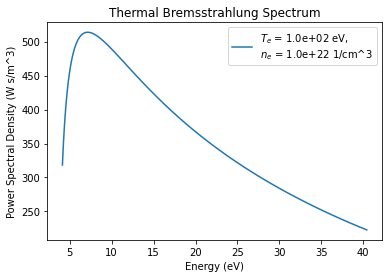

In [ ]:
energies = (frequencies * constants.h).to(units.eV)

fig, ax = plt.subplots()
label = (
    "$T_e$ = {:.1e} eV,\n".format(Te.to(units.eV).value) +
    "$n_e$ = {:.1e} 1/cm^3".format(ne.to(units.cm ** -3).value)
)
ax.plot(energies.to(units.eV), spectrum, label=label)
ax.set_title(f"Thermal Bremsstrahlung Spectrum")
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Power Spectral Density (W s/m^3)')
ax.legend()
fig;

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77a5caea-ff40-471d-8b4b-98dc66dd30c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>